In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [4]:
df = pd.read_csv('cars_multivariate.csv')
df.head(3)

mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0  18.0          8         307.0      130.0  3504.0          12.0     70   
1  15.0          8         350.0      165.0  3693.0          11.5     70   
2  18.0          8         318.0      150.0  3436.0          11.0     70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite

In [5]:
df['horsepower'] = pd.to_numeric(df.horsepower, errors='coerce')
df.horsepower.fillna(df.horsepower.mean(), inplace=True)

In [6]:
y = df.mpg
X = df.drop(['mpg', 'car_name', 'origin'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
X_train.head(1)

cylinders  displacement  horsepower  weight  acceleration  model
324          4          85.0        65.0  2110.0          19.2     80

In [9]:
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
regression = LinearRegression().fit(X_train, y_train)

In [11]:
mean_squared_error(y_test, regression.predict(X_test))

9.668178518310656

In [12]:
# *** play with layers/neurons
# *** play with optimizers

model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(6,), name='L1'))
model.add(Dense(units=8, activation='relu', name='L2'))
model.add(Dense(units=1, activation='linear', name='L3'))

opt = optimizers.SGD()
model.compile(loss='mse', optimizer=opt, metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 16)                112       
_________________________________________________________________
L2 (Dense)                   (None, 8)                 136       
_________________________________________________________________
L3 (Dense)                   (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size=25, verbose=0, validation_split=0.3, shuffle=True)

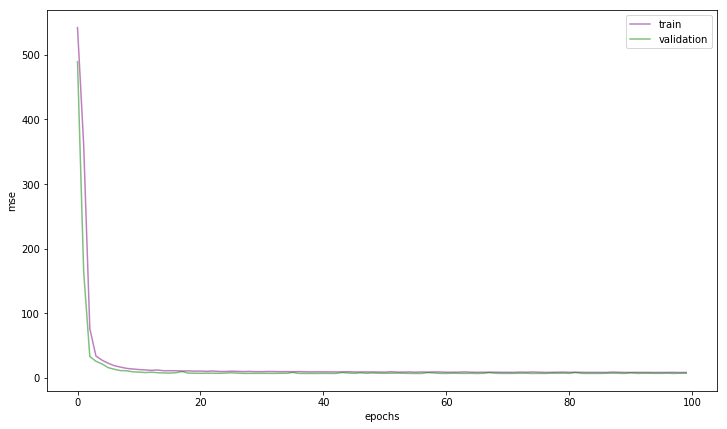

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(history.epoch, history.history['mse'], color='purple', alpha=0.5, label='train')
plt.plot(history.epoch, history.history['val_mse'], color='green', alpha=0.5, label='validation')
plt.xlabel('epochs')
plt.ylabel('mse')

plt.legend()
plt.show()

In [15]:
mean_squared_error(y_test, model.predict(X_test))

5.917903870759121